# we have to predict the number of positive and negative reviews based on sentiments by using different
  #classification models###

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv(r"C:\Users\user\Downloads\movie review dataset\IMDB Dataset.csv")

In [3]:
dataset

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [4]:
dataset["sentiment"].value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

In [5]:
dataset.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,negative
freq,5,25000


In [6]:
##splitting the positive and negative reviews#
train_sentiment=dataset.sentiment[:40000]

In [7]:
test_sentiment=dataset.sentiment[40000:]

In [8]:
print(train_sentiment.shape)

(40000,)


In [9]:
print(test_sentiment.shape)

(10000,)


# word cloud for postive review#

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

<function matplotlib.pyplot.show(close=None, block=None)>

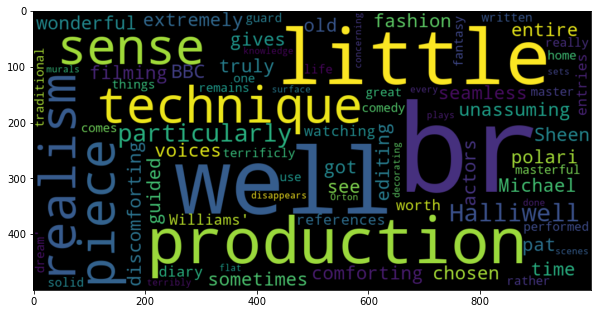

In [11]:
plt.figure(figsize=(10,10))
positive=dataset.review[1]
wc=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=wc.generate(positive)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

# word cloud for negative review#

<function matplotlib.pyplot.show(close=None, block=None)>

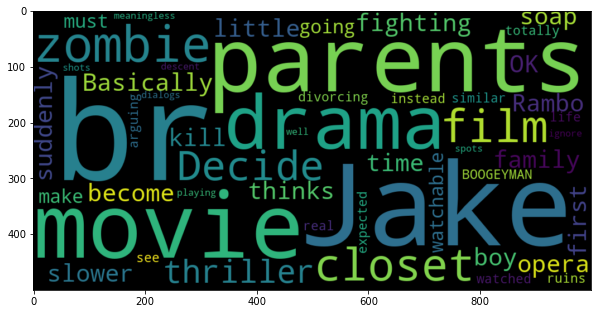

In [12]:
plt.figure(figsize=(10,10))
negative=dataset.review[3]
wc=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=wc.generate(negative)
plt.imshow(negative_words,interpolation='bilinear')
plt.show

In [13]:
dataset["sentiment"]

0        positive
1        positive
2        positive
3        negative
4        positive
           ...   
49995    positive
49996    negative
49997    negative
49998    negative
49999    negative
Name: sentiment, Length: 50000, dtype: object

In [14]:
dataset["review"]

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

# text mining or text preprocessing#

In [15]:
import re

In [16]:
dataset["review"]

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [17]:
review=dataset["review"][0]

In [18]:
review

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [19]:
review=re.sub("[^a-zA-Z]"," ",review)

In [20]:
review

'One of the other reviewers has mentioned that after watching just   Oz episode you ll be hooked  They are right  as this is exactly what happened with me  br    br   The first thing that struck me about Oz was its brutality and unflinching scenes of violence  which set in right from the word GO  Trust me  this is not a show for the faint hearted or timid  This show pulls no punches with regards to drugs  sex or violence  Its is hardcore  in the classic use of the word  br    br   It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary  It focuses mainly on Emerald City  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda  Em City is home to many  Aryans  Muslims  gangstas  Latinos  Christians  Italians  Irish and more    so scuffles  death stares  dodgy dealings and shady agreements are never far away  br    br   I would say the main appeal of the show is due to the fa

In [21]:
review=review.lower()

In [22]:
review

'one of the other reviewers has mentioned that after watching just   oz episode you ll be hooked  they are right  as this is exactly what happened with me  br    br   the first thing that struck me about oz was its brutality and unflinching scenes of violence  which set in right from the word go  trust me  this is not a show for the faint hearted or timid  this show pulls no punches with regards to drugs  sex or violence  its is hardcore  in the classic use of the word  br    br   it is called oz as that is the nickname given to the oswald maximum security state penitentary  it focuses mainly on emerald city  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda  em city is home to many  aryans  muslims  gangstas  latinos  christians  italians  irish and more    so scuffles  death stares  dodgy dealings and shady agreements are never far away  br    br   i would say the main appeal of the show is due to the fa

In [23]:
import nltk

In [24]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
from nltk.corpus import stopwords

In [26]:
sw=stopwords.words("english")

In [27]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [28]:
from nltk.stem.porter import PorterStemmer

In [29]:
ps=PorterStemmer()

In [30]:
review

'one of the other reviewers has mentioned that after watching just   oz episode you ll be hooked  they are right  as this is exactly what happened with me  br    br   the first thing that struck me about oz was its brutality and unflinching scenes of violence  which set in right from the word go  trust me  this is not a show for the faint hearted or timid  this show pulls no punches with regards to drugs  sex or violence  its is hardcore  in the classic use of the word  br    br   it is called oz as that is the nickname given to the oswald maximum security state penitentary  it focuses mainly on emerald city  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda  em city is home to many  aryans  muslims  gangstas  latinos  christians  italians  irish and more    so scuffles  death stares  dodgy dealings and shady agreements are never far away  br    br   i would say the main appeal of the show is due to the fa

In [31]:
d=[]

In [32]:
for word in review:
    if(word not in sw):
     d.append(ps.stem(word))

In [ ]:
d

In [33]:
review=' '.join(d)

In [34]:
review

'n e   f   h e   h e r   r e v e w e r   h   e n n e   h   f e r   w c h n g   j u       z   e p e   u   l l   b e   h k e     h e   r e   r g h       h     e x c l   w h   h p p e n e   w h   e     b r         b r       h e   f r   h n g   h   r u c k   e   b u   z   w     b r u l   n   u n f l n c h n g   c e n e   f   v l e n c e     w h c h   e   n   r g h   f r   h e   w r   g     r u   e     h     n     h w   f r   h e   f n   h e r e   r       h   h w   p u l l   n   p u n c h e   w h   r e g r     r u g     e x   r   v l e n c e         h r c r e     n   h e   c l c   u e   f   h e   w r     b r         b r           c l l e   z     h     h e   n c k n e   g v e n     h e   w l   x u   e c u r   e   p e n e n r       f c u e   n l   n   e e r l   c     n   e x p e r e n l   e c n   f   h e   p r n   w h e r e   l l   h e   c e l l   h v e   g l   f r n   n   f c e   n w r       p r v c     n   h g h   n   h e   g e n     e   c     h e     n     r n     u l     g n g     l n    

In [40]:
dataset["review"]

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [41]:
from nltk.stem import WordNetLemmatizer
wn=WordNetLemmatizer()

In [42]:
corpus=[]

In [43]:
for i in range(0,50000):
    review=dataset["review"][i]
    review=re.sub("[^a-zA-Z]"," ",review)
    review.lower()
    review=review.split()
    d=[]
    for word in review:
        if (word not in sw):
            d.append(wn.lemmatize(word,pos="v"))
    review=' '.join(d)
    corpus.append(review)

In [44]:
corpus

['One reviewers mention watch Oz episode hook They right exactly happen br br The first thing strike Oz brutality unflinching scenes violence set right word GO Trust show faint hearted timid This show pull punch regard drug sex violence Its hardcore classic use word br br It call OZ nickname give Oswald Maximum Security State Penitentary It focus mainly Emerald City experimental section prison cells glass front face inwards privacy high agenda Em City home many Aryans Muslims gangstas Latinos Christians Italians Irish scuffle death star dodgy deal shady agreements never far away br br I would say main appeal show due fact go show dare Forget pretty picture paint mainstream audiences forget charm forget romance OZ mess around The first episode I ever saw strike nasty surreal I say I ready I watch I develop taste Oz get accustom high level graphic violence Not violence injustice crook guard sell nickel inmates kill order get away well mannered middle class inmates turn prison bitch due l

In [45]:
##visualization of word cloud#
from wordcloud import WordCloud

In [46]:
import matplotlib.pyplot as plt

In [47]:
wc=WordCloud(background_color="black")

In [48]:
text=" ".join(corpus)

In [49]:
wc_img=wc.generate(text)

In [50]:
wc_img

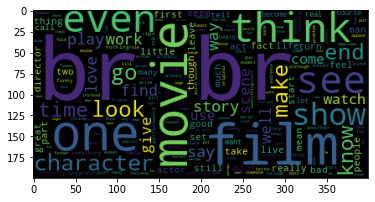

In [51]:
plt.imshow(wc_img)

# Bag of words#

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

In [53]:
cv=CountVectorizer(max_features=1600)

In [54]:
x=cv.fit_transform(corpus).toarray()

In [55]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [56]:
x.shape

(50000, 1600)

In [57]:
cv.get_feature_names()

['ability',
 'able',
 'absolute',
 'absolutely',
 'abuse',
 'accent',
 'accept',
 'accident',
 'accurate',
 'achieve',
 'across',
 'act',
 'action',
 'actor',
 'actors',
 'actress',
 'actresses',
 'actual',
 'actually',
 'adaptation',
 'add',
 'addition',
 'admit',
 'adult',
 'adults',
 'adventure',
 'affair',
 'affect',
 'afraid',
 'after',
 'age',
 'agent',
 'ago',
 'agree',
 'ahead',
 'air',
 'al',
 'alan',
 'alien',
 'alive',
 'all',
 'allen',
 'allow',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'amaze',
 'america',
 'american',
 'americans',
 'among',
 'amount',
 'amuse',
 'an',
 'and',
 'angle',
 'angry',
 'animal',
 'animals',
 'animate',
 'animation',
 'anne',
 'annoy',
 'another',
 'answer',
 'anti',
 'any',
 'anybody',
 'anymore',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'apart',
 'apartment',
 'apparent',
 'apparently',
 'appeal',
 'appear',
 'appearance',
 'appreciate',
 'approach',
 'are',
 'area',
 'arm',
 'army',
 'around',
 'arr

In [58]:
pd.DataFrame(x,columns=cv.get_feature_names())

,ability,able,absolute,absolutely,abuse,accent,accept,accident,accurate,achieve,...,years,yes,yet,york,you,young,younger,zero,zombie,zombies
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Tfidf Vectorizer#

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [60]:
tfidf=TfidfVectorizer(max_features=1600)

In [61]:
x_tfidf=tfidf.fit_transform(corpus).toarray()

In [62]:
x_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [63]:
tfidf.get_feature_names()

['ability',
 'able',
 'absolute',
 'absolutely',
 'abuse',
 'accent',
 'accept',
 'accident',
 'accurate',
 'achieve',
 'across',
 'act',
 'action',
 'actor',
 'actors',
 'actress',
 'actresses',
 'actual',
 'actually',
 'adaptation',
 'add',
 'addition',
 'admit',
 'adult',
 'adults',
 'adventure',
 'affair',
 'affect',
 'afraid',
 'after',
 'age',
 'agent',
 'ago',
 'agree',
 'ahead',
 'air',
 'al',
 'alan',
 'alien',
 'alive',
 'all',
 'allen',
 'allow',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'amaze',
 'america',
 'american',
 'americans',
 'among',
 'amount',
 'amuse',
 'an',
 'and',
 'angle',
 'angry',
 'animal',
 'animals',
 'animate',
 'animation',
 'anne',
 'annoy',
 'another',
 'answer',
 'anti',
 'any',
 'anybody',
 'anymore',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'apart',
 'apartment',
 'apparent',
 'apparently',
 'appeal',
 'appear',
 'appearance',
 'appreciate',
 'approach',
 'are',
 'area',
 'arm',
 'army',
 'around',
 'arr

In [64]:
pd.DataFrame(x_tfidf,columns=tfidf.get_feature_names())

,ability,able,absolute,absolutely,abuse,accent,accept,accident,accurate,achieve,...,years,yes,yet,york,you,young,younger,zero,zombie,zombies
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.097666,0.000000,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.087497,0.0,0.0,0.000000,0.000000,0.096199,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.330601,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.111444,0.000000,0.000000,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
49996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
49997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
49998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0


In [65]:
##labelling the sentiment data#
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()

In [66]:
y=lb.fit_transform(dataset['sentiment'])

In [67]:
y

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [68]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x_tfidf,y,test_size=0.2,random_state=42)

In [69]:
x_train

array([[0.10292616, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.19662801, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

# building the classification models#

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
lr=LogisticRegression()

In [72]:
lr.fit(x_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [73]:
##predicting the model#
y_pred = lr.predict(x_test)

In [74]:
y_pred

array([0, 1, 0, ..., 1, 0, 1])

In [75]:
##calculating accuracy score#
from sklearn.metrics import accuracy_score

In [76]:
accuracy_score(y_test,y_pred)

0.8778

In [77]:
##making classification report#
from sklearn.metrics import classification_report

In [78]:
report=classification_report(y_test,y_pred,target_names=['positive','negative'])

In [79]:
report

'              precision    recall  f1-score   support\n\n    positive       0.88      0.87      0.88      4961\n    negative       0.87      0.89      0.88      5039\n\n    accuracy                           0.88     10000\n   macro avg       0.88      0.88      0.88     10000\nweighted avg       0.88      0.88      0.88     10000\n'